In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.drop(['CustomerID', 'Genre', 'Age'], axis = 1, inplace=True)

In [9]:
df.head(2)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81


In [10]:
import matplotlib.pyplot as plt

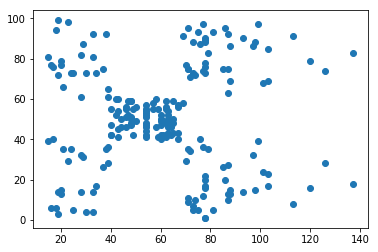

In [12]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])

In [13]:
# Trying scatter plot from seaborn library as well

import seaborn as sns

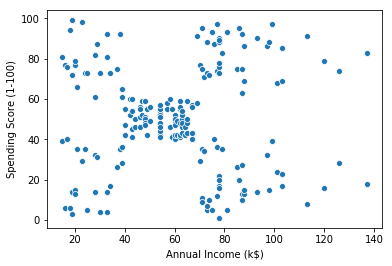

In [14]:
sns.scatterplot('Annual Income (k$)','Spending Score (1-100)', data = df)

In [16]:
from sklearn.cluster import KMeans

In [17]:
model = KMeans(n_clusters=1)

In [18]:
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
# to find the WCSS (within cluster sum of squares)

model.inertia_

269981.28

In [20]:
# Apply a loop to find WCSS values for diferent cluster values

In [22]:
list_wcss = []

for i in range(1, 41):
    model = KMeans(n_clusters=i)
    model.fit(df)
    list_wcss.append(model.inertia_)
    
print(list_wcss)

[269981.28, 183116.4295463669, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37455.984555160285, 30227.606513152015, 25005.55037243283, 21794.8856090982, 19649.59658286696, 17594.047906098695, 15955.001398959463, 14314.98023381847, 13452.922644110276, 11855.720852016695, 10803.574544315334, 10160.467762354605, 9257.29905582923, 8662.925607725607, 8209.571976024974, 7645.543708445339, 7299.2984961898, 6858.472060917202, 6420.487387069453, 6200.4675144300145, 5681.267893888018, 5499.296871517752, 5318.4090576090575, 4922.504376669083, 4727.584307359308, 4490.113419913419, 4246.0361111111115, 4229.462806637806, 3792.093542568543, 3786.4161255411254, 3491.1656204906203, 3464.070238095238, 3286.310125985126, 2965.3874458874457, 2784.1858225108226]


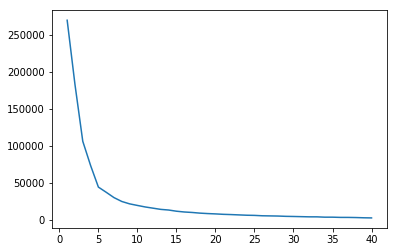

In [23]:
# Plotting the data for better visualizations
plt.plot(range(1,41), list_wcss)

In [24]:
# the point where the elbow is formed i.e. point where sharp decline is reduced that is the correct number of clusters
# hence cluster value is 5

In [29]:
model = KMeans(n_clusters=5)
model.fit(df)
model.inertia_

44448.45544793371

In [45]:
# continue.. after some graphs

# printing centroids for clusters

In [33]:
model.cluster_centers_

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852]])

In [30]:
xl =[]
for x in model.cluster_centers_:
    print(x[0])
    xl.append(x[0])

25.727272727272755
88.20000000000002
86.53846153846155
26.304347826086982
55.29629629629632


In [31]:
yl =[]
for y in model.cluster_centers_:
    print(y[1])
    yl.append(y[1])

79.36363636363636
17.1142857142857
82.12820512820511
20.913043478260867
49.51851851851852


Text(0.5,1,'Annual Income Vs Spending Score')

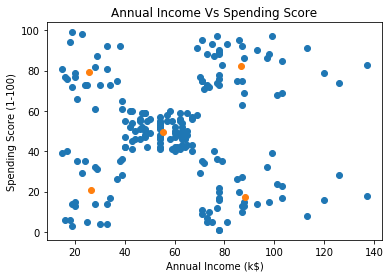

In [32]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.scatter(xl, yl)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income Vs Spending Score')

In [35]:
model.labels_

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

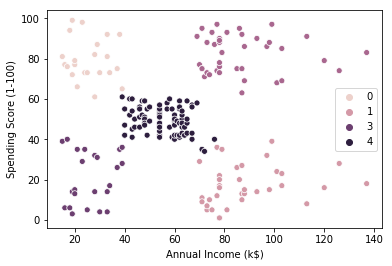

In [34]:
sns.scatterplot('Annual Income (k$)','Spending Score (1-100)', data = df, hue = model.labels_)

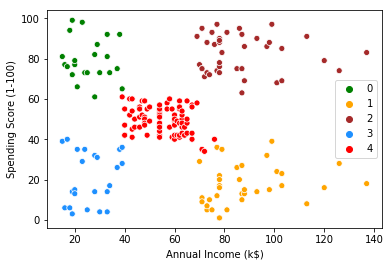

In [36]:
sns.scatterplot('Annual Income (k$)','Spending Score (1-100)', data = df, hue = model.labels_, palette=['green','orange','brown','dodgerblue','red'])

In [37]:
# Resuming..

In [38]:
model = KMeans(n_clusters=5)
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
model.inertia_

44448.45544793371

In [40]:
# Adding a new column in df with value as cluster number

In [41]:
cluster_pred = model.predict(df)

In [42]:
cluster_pred

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [43]:
df['cluster'] = cluster_pred

In [44]:
df.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3


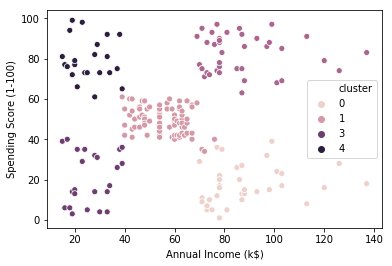

In [47]:
sns.scatterplot('Annual Income (k$)','Spending Score (1-100)', data = df, hue = 'cluster')

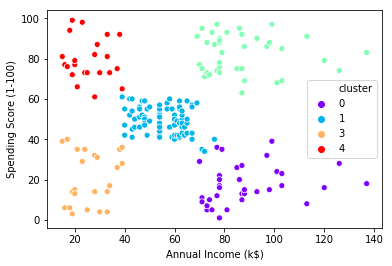

In [48]:
sns.scatterplot('Annual Income (k$)','Spending Score (1-100)', data = df, hue = 'cluster', palette='rainbow')

In [49]:
dict_mapping = {
    0 : 'Low AI, Low SS',
    1 : 'Med AI, Med SS',
    2 : 'High AI, Low SS',
    3 : 'Low AI, High SS',
    4 : 'High AI, High SS'
}

In [50]:
df['cluster'] = df['cluster'].map(dict_mapping)

In [53]:
df.head(10)

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,"Low AI, High SS"
1,15,81,"High AI, High SS"
2,16,6,"Low AI, High SS"
3,16,77,"High AI, High SS"
4,17,40,"Low AI, High SS"
5,17,76,"High AI, High SS"
6,18,6,"Low AI, High SS"
7,18,94,"High AI, High SS"
8,19,3,"Low AI, High SS"
9,19,72,"High AI, High SS"
